In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from mne import read_epochs, concatenate_epochs, set_log_level
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [33]:
set_log_level('warning')

In [34]:
confidence_99_left_rest = [.77, .83, .72, .72, .81, .73, .8, .67, .74, .67, .71, .75, .75, .75, .74, .83, .69, .72]
confidence_95_left_rest = [.72, .78, .67, .68, .75, .68, .75,.63, .69, .63, .67, .70, .70, .70, .70, .77, .64, .67]
confidence_99_left_right = [.70,.73, .73, .72, .71, .72, .71,.66, .72, .68, .68, .75, .70, .68, .73, .79, .71, .69]
confidence_95_left_right = [.66,.68, .68, .68, .66, .66, .66,.63, .67, .64, .64, .70, .65, .64, .73, .72, .67, .64]
confidence_95_3_class = [.50, .54, .49, .48, .52, .48, .52, .47, .51, .44, .47, .48, .50, .48, .51, .59, .47, .49]
confidence_99_3_class = [.54, .58, .53, .52, .56, .52, .57, .50, .55, .47, .51, .52, .54, .52, .54, .65, .51, .53]

Pipeline results

In [35]:
train_accuracy_left_rest = [.62,  .7,  .56, .57, .66, .91, .6,  .96, .87, .78, .66, .56, .58, .61, .78, .59, .525]
test_accuracy_left_rest = [.69,  .9,  .63, .69, .89, .93, .83, .93, .89,  .8, .74, .64, .61, .56, .76, .56, .69]

In [36]:
train_accuracy_left_right =[.47, .48, .52, .48, .53, .54,  .48, .57, .54, .52, .53, .51, .43, .56, .56, .57, .55]
test_accuracy_left_right = [.56, .58, .525, .58, .69, .48, .52, .76, .65, .55, .63, .72, .56, .66, .6, .7, .58]

In [37]:
train_accuracy_extra_feature_left_rest  = [.51, .77, .46, .57, .68, .91, .59, .94, .89, .73, .55, .54, .56, .6, .76, .45, .63]
test_accuracy_extra_feature_left_rest =  [.7, .71, .56, .505, .79, .95, .73, .95, .91, .81, .58, .53, .56, .64, .8, .66, .7]

In [38]:
train_accuracy_extra_feature_left_right  = [.54, .5,  .51, .48, .55, .5, .57,  .57, .49,  .49, .54, .45, .51, .48, .53, .48, .49]
test_accuracy_extra_feature_left_right = [.49, .59, .59, .52, .66, .47, .48, .67, .515, .51, .48, .46, .55, .52, .57, .46, .54]

In [39]:
psd_score_left_rest = [.7, .79, .69, .6, .79, .89, .75, .7,  .93, .77, .7, .5, .58, .49, .72, .81, .63]
psd_score_left_right =[.49, .48, .5, .55, .63, .5, .44, .51, .59, .43, .53, .57, .53, .43, .57, .61, .6]

In [40]:
nris_left_rest = [.71, .83, .77, .68, .91, .81, .82, .7, .77, .76, .89, .89,  .71, .84, .84, .78, .77, .8]
nirs_left_right = [.69, .8, .64,  .53, .82, .84, .76, .66, .63 , .7, .74, .875,.69, .87,.79, .74, .6, .82]

In [41]:
dwt_score_left_rest = [.88, .88, .89, .91, .84, .85, .85, .83, .8, .85, .91, .79, .84,  .88, .84,.87,.85, .8]
dwt_score_left_right =[.88, .81, .87, .84, .84, .86, .77, .77, .84, .8, .88, .81, .88,  .8, .78,.7,.87, .82]

In [42]:
dwt_fs_left_rest =  [.88, .89, .95, .91 ,.9, .94, .89, .9,  .89,  .88, .92, .9,  .91, .8, .84, .88, .85,.8]
dwt_fs_left_right = [.86, .81, .87, .84, .84, .93, .86, .81, .85, .83, .87, .81, .88, .86, .84, .94, .8,.82]

In [43]:
nirs_eeg_left_rest = [.96, .95, .98, .95, .91, .98, .97, .95, .91, .92, .96, .89, .91, .84, .84, .88, .86, .8]
nirs_eeg_left_right = [.89, .88, .901, .91, .82, .91, .9, .86, .94, .84, .84, .875, .94, .87, .79, .9, .88, .82]

In [44]:
rhy_left_rest =  [.98, .93, .91, .93, .89, .90, .91, .93, .9, .93, .92, .93, .93, .86, .89, .87, .9]
rhy_left_right = [.84, .83, .87, .89, .87, .86, .87, .84, .86, .9, .72, .85, .86, .86, .77, .9, .81]
rhy_3 =          [.79, .69, .69, .79, .76, .85, .75, .72, .77, .78, .7, .83, .79, .75, .79, .83, .775, .61]

In [47]:
eeg_3 =      [.75, .71,   .73, .75, .73, .79, .66, .7, .72, .69, .63, .73, .71, .72, .64, .73, .68, .61]
nirs_3 =     [.45, .53,  .46, .54, .71, .54, .51, .50,.47, .53, .61, .67, .44, .72, .64, .53, .52, .61]
nirs_eeg_3 = [.77, .79, .826, .81, .71, .81, .73, .8, .81, .75, .77, .67, .81, .72, .64, .75, .79, .61]

In [48]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
csp_left_rest = []
csp_left_right = []
dwt_classifiers_left_rest = []
dwt_classifiers_left_right = []
dwt_selectors_left_rest = []
dwt_selectors_left_right = []
riemannian_left_rest = []
riemannian_left_right = []
features_left_rest_fix = []
features_left_right_fix = []
features_left_rest_custom = []
features_left_right_custom = []

i=0
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        dir_name = str(dr).split("'")[-2]
        for file in os.listdir(dr):
            file_name = str(file).split("'")[-2]
            if file_name == 'csp_left_rest.npy':
                csp_left_rest.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'csp_left_right.npy':
                csp_left_right.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'dwt_classifiers_left_rest.npy':
                dwt_classifiers_left_rest.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'dwt_classifiers_left_right.npy':
                dwt_classifiers_left_right.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'dwt_selectors_left_rest.npy':
                dwt_selectors_left_rest.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'dwt_selectors_left_right.npy':
                dwt_selectors_left_right.append(np.load(dir_name+'/'+file_name))
            elif file_name == 'riemannian_left_rest.npy':
                riemannian_left_rest.append(np.load(dir_name+'/'+file_name)[:-1])
            elif file_name == 'riemannian_left_right.npy':
                riemannian_left_right.append(np.load(dir_name+'/'+file_name)[:-1])
            elif file_name == 'left_rest_fix_features.npy':
                features_left_rest_fix.append(np.load(dir_name+'/'+file_name)[:-1])
            elif file_name == 'left_rest_custom_features.npy':
                features_left_rest_custom.append(np.load(dir_name+'/'+file_name)[:-1])
            elif file_name == 'left_right_fix_features.npy':
                features_left_right_fix.append(np.load(dir_name+'/'+file_name)[:-1])
            elif file_name == 'left_right_custom_features.npy':
                features_left_right_custom.append(np.load(dir_name+'/'+file_name)[:-1])
#                 if(dir_name=='mrl') :
#                     riemannian_left_rest.append(np.array([.811,.58,.69,.83,.77])[:-1])
                    
dwt_selectors_left_rest[0] = np.array([0.775,  0.88333, 0.416666, 0.35833])
dwt_selectors_left_rest[1] = np.array([0.73791208,  0.896153, 0.530769230, 0.63296703])

 distribution of selected features by MRMR

In [45]:
cnc = np.concatenate(features_left_rest_fix)
unique, counts = np.unique(cnc, return_counts=True)
idx = np.argwhere(counts > 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_7492\1707380074.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))


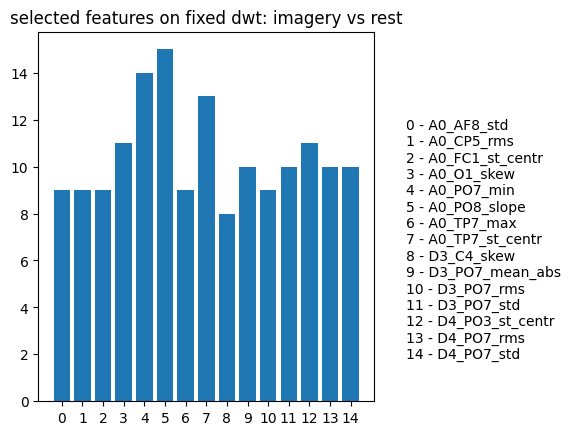

In [46]:
fig, axes= plt.subplots(1)
axes.bar(np.concatenate(unique[idx]), np.concatenate(counts[idx]))

x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(range(len(np.concatenate(unique[idx]))),np.concatenate(unique[idx])))
axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))
t = axes.text(.7,.2,x_legend,transform=axes.figure.transFigure)
axes.set_title("selected features on fixed dwt: imagery vs rest")
fig.subplots_adjust(right=.65)


In [42]:
cnc = np.concatenate(features_left_right_fix)
unique, counts = np.unique(cnc, return_counts=True)
idx = np.argwhere(counts > 5)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9888\276691811.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))


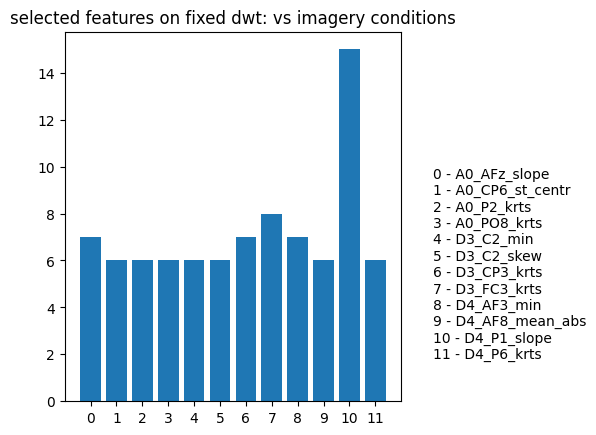

In [43]:
fig, axes= plt.subplots(1)
axes.bar(np.concatenate(unique[idx]), np.concatenate(counts[idx]))

x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(range(len(np.concatenate(unique[idx]))),np.concatenate(unique[idx])))
axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))
t = axes.text(.7,.2,x_legend,transform=axes.figure.transFigure)
axes.set_title("selected features on fixed dwt: vs imagery conditions")
fig.subplots_adjust(right=.65)


In [68]:
cnc = np.concatenate(features_left_rest_custom)

In [77]:
custom_fts = []
for ft in cnc:
    if ft[0] == 'D':
        custom_fts.append(ft[3:])
    else:
        custom_fts.append(ft)
        
unique, counts = np.unique(custom_fts, return_counts=True)
idx = np.argwhere(counts > 8)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9888\2184805921.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))


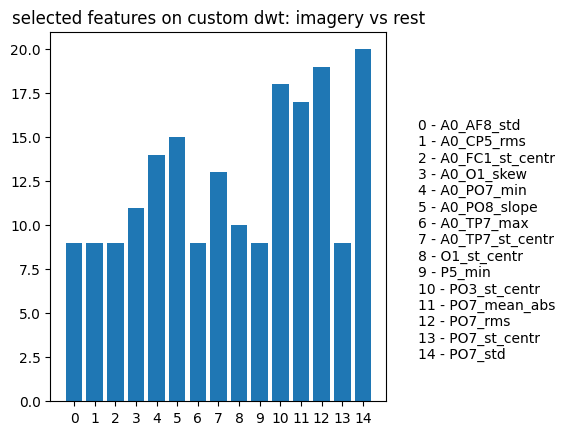

In [78]:
fig, axes= plt.subplots(1)
axes.bar(np.concatenate(unique[idx]), np.concatenate(counts[idx]))

x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(range(len(np.concatenate(unique[idx]))),np.concatenate(unique[idx])))
axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))
t = axes.text(.7,.2,x_legend,transform=axes.figure.transFigure)
axes.set_title("selected features on custom dwt: imagery vs rest")
fig.subplots_adjust(right=.65)


In [81]:
cnc = np.concatenate(features_left_right_custom)

In [82]:
custom_fts = []
for ft in cnc:
    if ft[0] == 'D':
        custom_fts.append(ft[3:])
    else:
        custom_fts.append(ft)
        
unique, counts = np.unique(custom_fts, return_counts=True)
idx = np.argwhere(counts > 6)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9888\3989812757.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))


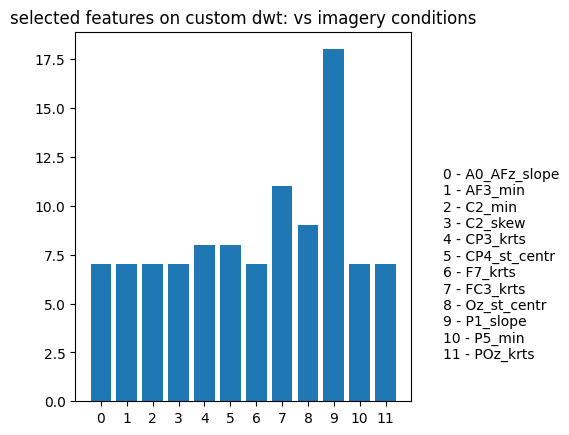

In [83]:
fig, axes= plt.subplots(1)
axes.bar(np.concatenate(unique[idx]), np.concatenate(counts[idx]))

x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(range(len(np.concatenate(unique[idx]))),np.concatenate(unique[idx])))
axes.set_xticklabels(np.arange(len(np.concatenate(unique[idx]))))
t = axes.text(.7,.2,x_legend,transform=axes.figure.transFigure)
axes.set_title("selected features on custom dwt: vs imagery conditions")
fig.subplots_adjust(right=.65)

In [60]:
subjects = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17']
X_axis = np.arange(len(subjects))

subjects_nirs = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18']
X_axis_nirs = np.arange(len(subjects_nirs))

chances_start = np.arange(len(subjects)) -.4
chances_end = chances_start + .8

chances_start_nirs = np.arange(len(subjects_nirs)) -.4
chances_end_nirs = chances_start_nirs + .8

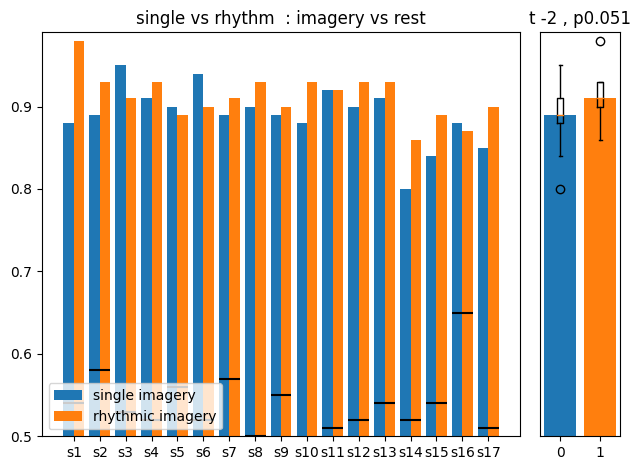

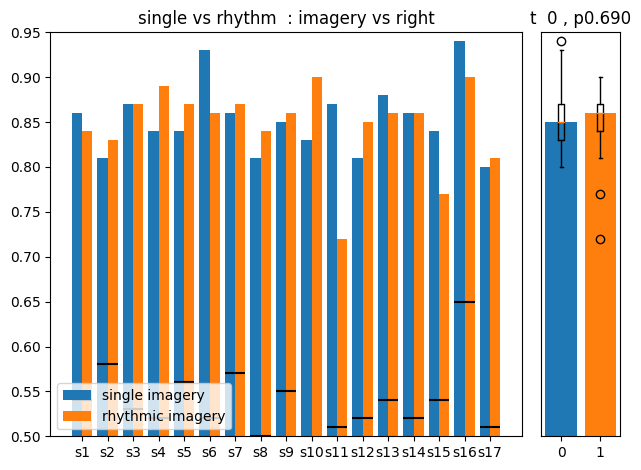

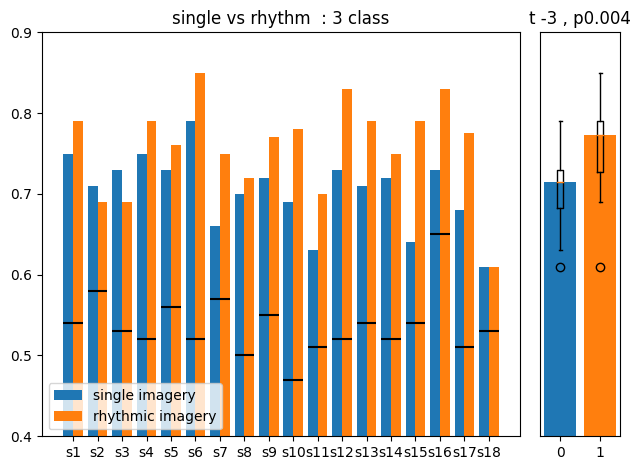

In [69]:
fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 1]})

tval, pval = ttest_ind(dwt_fs_left_rest[:-1], rhy_left_rest)

axes[0].bar(X_axis-.2, dwt_fs_left_rest[:-1], .4, label= "single imagery")
axes[0].bar(X_axis+.2, rhy_left_rest, .4, label= "rhythmic imagery")
axes[1].bar([0,1], [np.median(dwt_fs_left_rest[:-1]), 0])
axes[1].bar([0,1], [0, np.median(rhy_left_rest)])
axes[1].boxplot([dwt_fs_left_rest[:-1],rhy_left_rest], positions=[0,1])
axes[0].set_xticks(X_axis)
axes[0].set_xticklabels(subjects)
axes[1].set_yticks([])
axes[0].hlines(confidence_99_3_class[:-1], chances_start, chances_end,  color="black")

axes[0].set_title('single vs rhythm  : imagery vs rest')
axes[0].legend(loc='lower left')
axes[1].set_title('t%3.f , p%.3f'%(tval,pval))
axes[1].set_ylim(0.5,0.99)
axes[0].set_ylim(0.5,.99)

plt.tight_layout()

fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 1]})

tval, pval = ttest_ind(dwt_fs_left_right[:-1], rhy_left_right)

axes[0].bar(X_axis-.2, dwt_fs_left_right[:-1], .4, label= "single imagery")
axes[0].bar(X_axis+.2, rhy_left_right, .4, label= "rhythmic imagery")
axes[1].bar([0,1], [np.median(dwt_fs_left_right[:-1]), 0])
axes[1].bar([0,1], [0, np.median(rhy_left_right)])
axes[1].boxplot([dwt_fs_left_right[:-1],rhy_left_right], positions=[0,1])
axes[0].set_xticks(X_axis)
axes[0].set_xticklabels(subjects)
axes[1].set_yticks([])
axes[1].set_ylim(0.5,0.95)
axes[0].set_ylim(0.5,.95)
axes[0].hlines(confidence_99_3_class[:-1], chances_start, chances_end,  color="black")


axes[0].set_title('single vs rhythm  : imagery vs right')
axes[0].legend(loc='lower left')
axes[1].set_title('t%3.f , p%.3f'%(tval,pval))
plt.tight_layout()

fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 1]})

tval, pval = ttest_ind(eeg_3, rhy_3)

axes[0].bar(X_axis_nirs-.2, eeg_3, .4, label= "single imagery")
axes[0].bar(X_axis_nirs+.2, rhy_3, .4, label= "rhythmic imagery")
axes[1].bar([0,1], [np.median(eeg_3), 0])
axes[1].bar([0,1], [0, np.median(rhy_3)])
axes[1].boxplot([eeg_3,rhy_3], positions=[0,1])
axes[0].set_xticks(X_axis_nirs)
axes[0].set_xticklabels(subjects_nirs)
axes[1].set_yticks([])
axes[1].set_ylim(0.4,0.9)
axes[0].set_ylim(0.4,.9)
axes[0].hlines(confidence_99_3_class, chances_start_nirs, chances_end_nirs,  color="black")


axes[0].set_title('single vs rhythm  : 3 class')
axes[0].legend(loc='lower left')
axes[1].set_title('t%3.f , p%.3f'%(tval,pval))
plt.tight_layout()

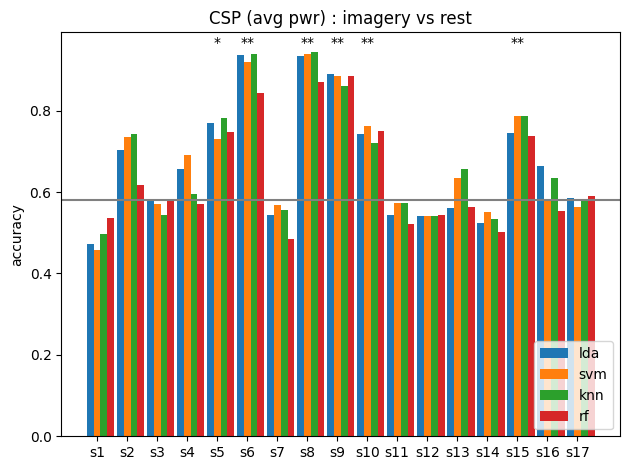

In [83]:
fig, axes= plt.subplots(1)
labels = ['lda', 'svm', 'knn', 'rf']
x_s = -.23
i = 0

for sbj in np.array(csp_left_rest).T:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
for i, s in enumerate(subjets):
    if np.array(csp_left_rest).T[2,i] > confidence_99_left_rest[i] :
        plt.text(i, 0.95, '**', ha='center', va='bottom', c='k')
    elif np.array(csp_left_rest).T[2,i] > confidence_95_left_rest[i] :
        plt.text(i, 0.95, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(np.array(csp_left_rest).T[3]), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("CSP (avg pwr) : imagery vs rest")
plt.tight_layout()
axes.legend(loc="lower right")

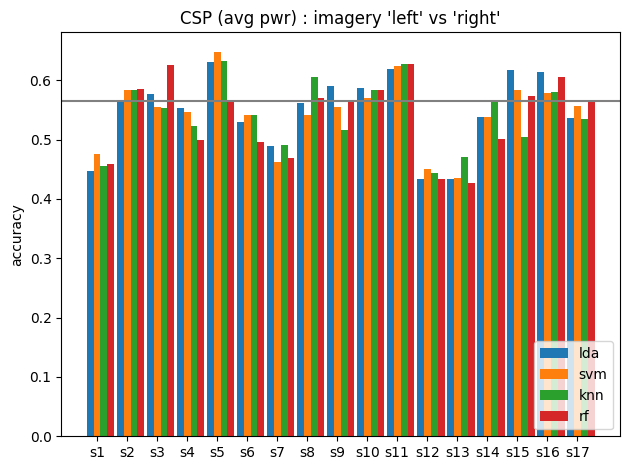

In [84]:
fig, axes= plt.subplots(1)
labels = ['lda', 'svm', 'knn', 'rf']
x_s = -.23
i = 0

scores = np.array(csp_left_right).T

for sbj in scores:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
for i, s in enumerate(subjets):
    if scores[0,i] > confidence_99_left_right[i] :
        plt.text(i, 0.7, '**', ha='center', va='bottom', c='k')
    elif scores[0,i] > confidence_95_left_right[i] :
        plt.text(i, 0.7, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(scores[3]), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("CSP (avg pwr) : imagery 'left' vs 'right'")
plt.tight_layout()
axes.legend(loc="lower right")

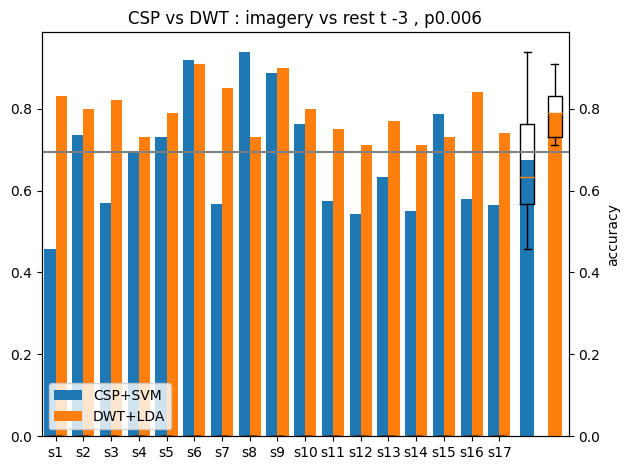

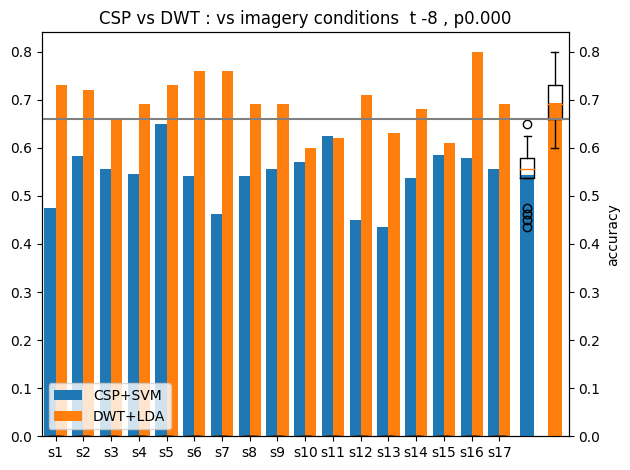

In [169]:
fig, axes= plt.subplots(1)
labels = ['lda', 'svm', 'knn', 'rf']
x_s = -.23
i = 0

scores = np.array(csp_left_rest).T[1]

tval, pval = ttest_ind(scores, np.array(dwt_score_left_rest))

means = []
means_bars = []
means_bars1 = []
for sb in range(len(subjets)) :
    means.append([0])
    means_bars.append(0)

means_bars1 = means_bars
means_bars = np.append(np.array(means_bars), [np.mean(scores),0]) 
means_bars1 = np.append(np.array(means_bars1), [0,np.mean(np.array(dwt_score_left_rest))]) 
means.append(scores)
means.append(np.array(dwt_score_left_rest))


axes.bar(X_axis-.2, scores, .4, label= 'CSP+SVM')
axes.bar(X_axis+.2, np.array(dwt_score_left_rest), .4, label= 'DWT+LDA')
 
axes1 = axes.twinx() 
axes1.bar(X_axis_mean, means_bars , .5)
axes1.bar(X_axis_mean, means_bars1 , .5)
axes1.boxplot(means, positions=X_axis_mean)
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(confidence_95_left_rest), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("CSP vs DWT : imagery vs rest " +'t%3.f , p%.3f'%(tval,pval))
plt.tight_layout()
axes.legend(loc="lower left")

fig, axes= plt.subplots(1)
scores = np.array(csp_left_right).T[1]

tval, pval = ttest_ind(scores, np.array(dwt_score_left_right))

means = []
means_bars = []
means_bars1 = []
for sb in range(len(subjets)) :
    means.append([0])
    means_bars.append(0)

means_bars1 = means_bars
means_bars = np.append(np.array(means_bars), [np.mean(scores),0]) 
means_bars1 = np.append(np.array(means_bars1), [0,np.mean(np.array(dwt_score_left_right))]) 
means.append(scores)
means.append(np.array(dwt_score_left_right))


axes.bar(X_axis-.2, scores, .4, label= 'CSP+SVM')
axes.bar(X_axis+.2, np.array(dwt_score_left_right), .4, label= 'DWT+LDA')
 
axes1 = axes.twinx() 
axes1.bar(X_axis_mean, means_bars , .5)
axes1.bar(X_axis_mean, means_bars1 , .5)
axes1.boxplot(means, positions=X_axis_mean)
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(confidence_95_left_right), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("CSP vs DWT : vs imagery conditions  " +'t%3.f , p%.3f'%(tval,pval))
plt.tight_layout()
axes.legend(loc="lower left")

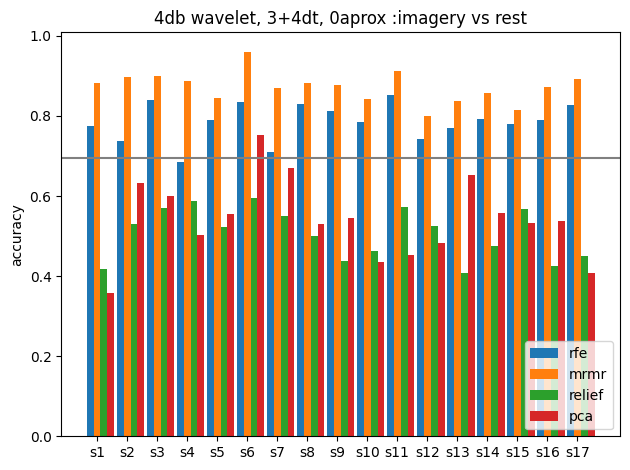

In [172]:
fig, axes= plt.subplots(1)
labels = ['rfe', 'mrmr', 'relief','pca']
x_s = -.23
i = 0

scores = np.array(dwt_selectors_left_rest).T

for sbj in scores:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
# for i, s in enumerate(subjets):
#     if scores[1,i] > confidence_99_left_rest[i] :
#         plt.text(i, 0.95, '**', ha='center', va='bottom', c='k')
#     elif scores[1,i] > confidence_95_left_rest[i] :
#         plt.text(i, 0.95, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(confidence_95_left_rest), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("4db wavelet, 3+4dt, 0aprox :imagery vs rest")
plt.tight_layout()
axes.legend(loc="lower right")

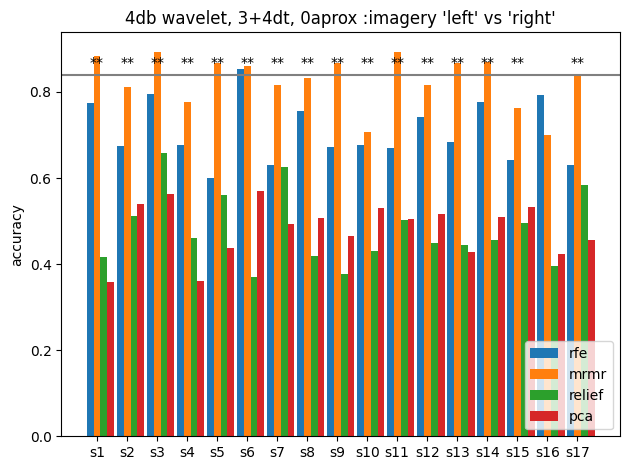

In [23]:
fig, axes= plt.subplots(1)
labels = ['rfe', 'mrmr', 'relief','pca']
x_s = -.23
i = 0

scores = np.array(dwt_selectors_left_right).T

for sbj in scores:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
for i, s in enumerate(subjets):
    if scores[1,i] > confidence_99_left_right[i] :
        plt.text(i, 0.85, '**', ha='center', va='bottom', c='k')
    elif scores[1,i] > confidence_95_left_right[i] :
        plt.text(i, 0.85, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(scores[1]), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("4db wavelet, 3+4dt, 0aprox :imagery 'left' vs 'right'")
plt.tight_layout()
axes.legend(loc="lower right")


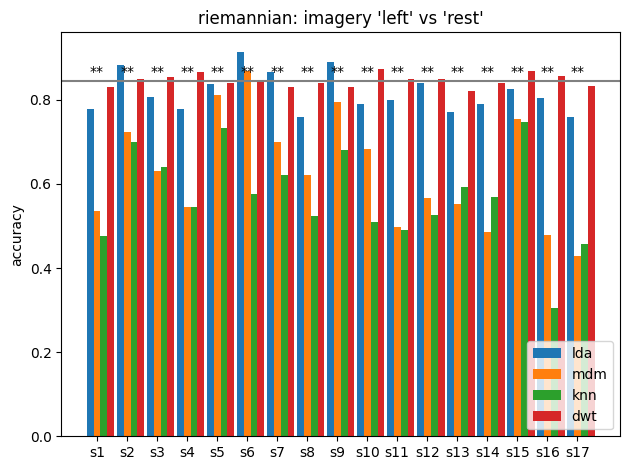

In [110]:
fig, axes= plt.subplots(1)
labels = ['lda', 'mdm', 'knn','dwt']
x_s = -.23
i = 0

scores = np.array(riemannian_left_rest).T

for sbj in scores:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
for i, s in enumerate(subjets):
    if scores[-1,i] > confidence_99_left_rest[i] :
        plt.text(i, 0.85, '**', ha='center', va='bottom', c='k')
    elif scores[-1,i] > confidence_95_left_rest[i] :
        plt.text(i, 0.85, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(scores[-1]), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("riemannian: imagery 'left' vs 'rest'")
plt.tight_layout()
axes.legend(loc="lower right")


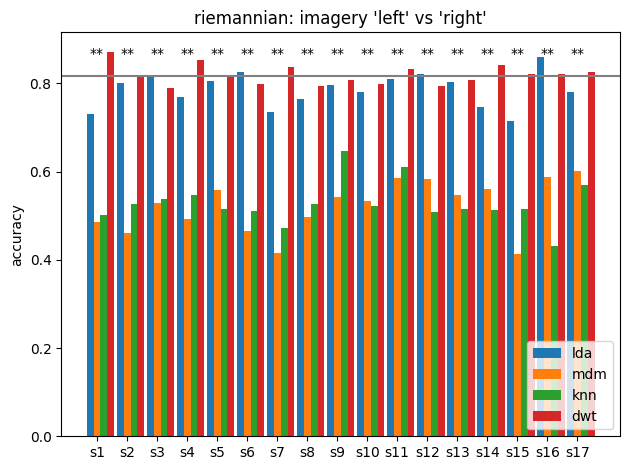

In [111]:
fig, axes= plt.subplots(1)
labels = ['lda', 'mdm', 'knn','dwt']
x_s = -.23
i = 0

scores = np.array(riemannian_left_right).T

for sbj in scores:
    axes.bar(X_axis+x_s, sbj, 0.23, label= labels[i])
    i += 1
    x_s += .23
    
for i, s in enumerate(subjets):
    if scores[-1,i] > confidence_99_left_right[i] :
        plt.text(i, 0.85, '**', ha='center', va='bottom', c='k')
    elif scores[-1,i] > confidence_95_left_right[i] :
        plt.text(i, 0.85, '*', ha='center', va='bottom', c='k')
    
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
plt.axhline(y=np.median(scores[-1]), color="grey")
axes.set_xticklabels(subjets)
axes.set_title("riemannian: imagery 'left' vs 'right'")
plt.tight_layout()
axes.legend(loc="lower right")


In [90]:
fix_dwt_results = np.array(dwt_selectors_left_rest).T[1]
fix_dwt_results = np.append(fix_dwt_results, [0,0])
len(fix_dwt_results)

19

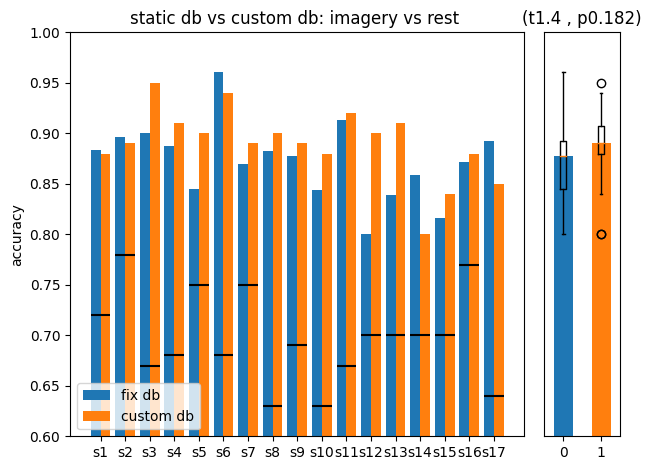

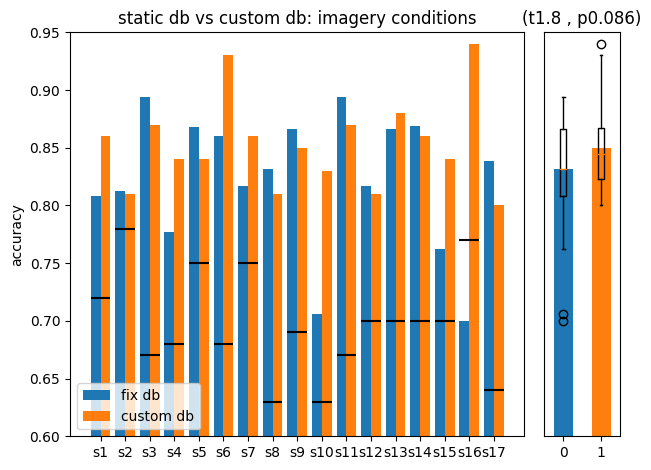

In [55]:
fix_results = np.array(dwt_selectors_left_rest).T[1]
tval, pval = ttest_ind(dwt_fs_left_rest[:-1], fix_results)

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 1]})

axes[0].bar(X_axis-.2, fix_results , .4, label= 'fix db')
axes[0].bar(X_axis+.2, dwt_fs_left_rest[:-1], .4, label= 'custom db')

axes[1].bar([0,1], [np.median(fix_results), 0], .5, label= 'fix db')
axes[1].bar([0,1], [0, np.median(dwt_fs_left_rest[:-1])], .5, label= 'fix db')
axes[1].boxplot([fix_results, dwt_fs_left_rest], positions=[0,1])
axes[1].set_yticks([])
axes[1].set_ylim(0.6,1.)
axes[0].set_ylim(0.6,1.)

axes[0].set_ylabel("accuracy")
axes[0].set_xticks(np.arange(len(subjects)))
axes[0].set_xticklabels(subjects)
axes[0].hlines(confidence_95_left_rest[:-1], chances_start, chances_end,  color="black")


axes[0].set_title("static db vs custom db: imagery vs rest ")
axes[1].set_title('(t%.1f , p%.3f)'%(tval,pval))
axes[0].legend(loc="lower left")
plt.tight_layout()


fix_results = np.array(dwt_selectors_left_right).T[1]
tval, pval = ttest_ind(dwt_fs_left_right[:-1], fix_results)

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 1]})

axes[0].bar(X_axis-.2, fix_results , .4, label= 'fix db')
axes[0].bar(X_axis+.2, dwt_fs_left_right[:-1], .4, label= 'custom db')

axes[1].bar([0,1], [np.median(fix_results), 0], .5, label= 'fix db')
axes[1].bar([0,1], [0, np.median(dwt_fs_left_right[:-1])], .5, label= 'fix db')
axes[1].boxplot([fix_results, dwt_fs_left_right], positions=[0,1])
axes[1].set_yticks([])
axes[1].set_ylim(0.6,0.95)
axes[0].set_ylim(0.6,.95)

axes[0].set_ylabel("accuracy")
axes[0].set_xticks(np.arange(len(subjects)))
axes[0].set_xticklabels(subjects)
axes[0].hlines(confidence_95_left_rest[:-1], chances_start, chances_end,  color="black")


axes[0].set_title("static db vs custom db: imagery conditions")
axes[1].set_title('(t%.1f , p%.3f)'%(tval,pval))
axes[0].legend(loc="lower left")
plt.tight_layout()



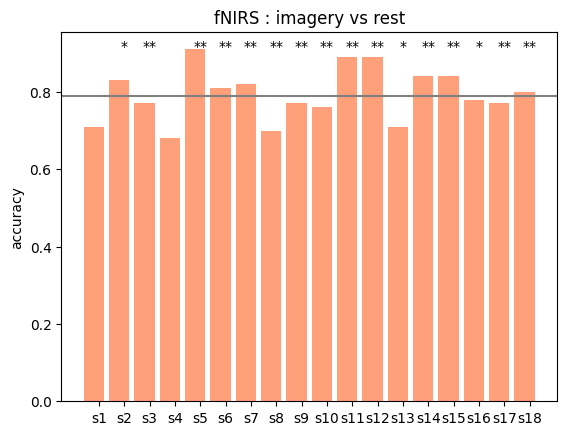

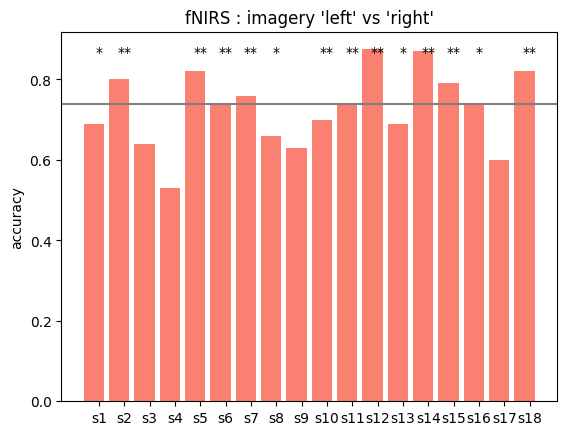

In [56]:
fig, axes= plt.subplots(1)
axes.bar(X_axis-.2, nris_left_rest, color='lightsalmon')
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
plt.axhline(y=np.median(nris_left_rest), color="grey")

axes.set_title("fNIRS : imagery vs rest")

for i, s in enumerate(subjets):
    if nris_left_rest[i] > confidence_99_left_rest[i] :
        plt.text(i, 0.9, '**', ha='center', va='bottom', c='k')
    elif nris_left_rest[i] > confidence_95_left_rest[i] :
        plt.text(i, 0.9, '*', ha='center', va='bottom', c='k')
        
X_axis = np.arange(len(subjets))
fig, axes= plt.subplots(1)
axes.bar(X_axis-.2, nirs_left_right, color='salmon')
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
plt.axhline(y=np.median(nirs_left_right), color="grey")

axes.set_title("fNIRS : imagery 'left' vs 'right'")

for i, s in enumerate(subjets):
    if nirs_left_right[i] > confidence_99_left_right[i] :
        plt.text(i, 0.85, '**', ha='center', va='bottom', c='k')
    elif nirs_left_right[i] > confidence_95_left_right[i] :
        plt.text(i, 0.85, '*', ha='center', va='bottom', c='k')

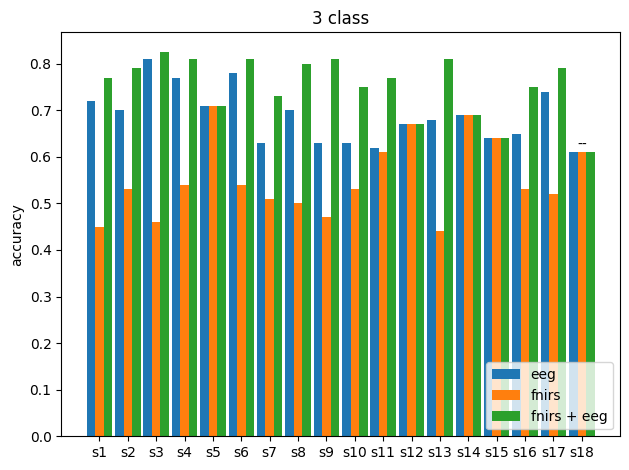

In [67]:

fig, axes= plt.subplots(1)
axes.bar(X_axis -0.3, eeg_3, 0.3, label= 'eeg')
axes.bar(X_axis, nirs_3, 0.3, label= 'fnirs')
axes.bar(X_axis +0.3, nirs_eeg_3, 0.3, label= 'fnirs + eeg')

plt.text(17, 0.61, '--', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("3 class")
plt.tight_layout()
axes.legend(loc="lower right")


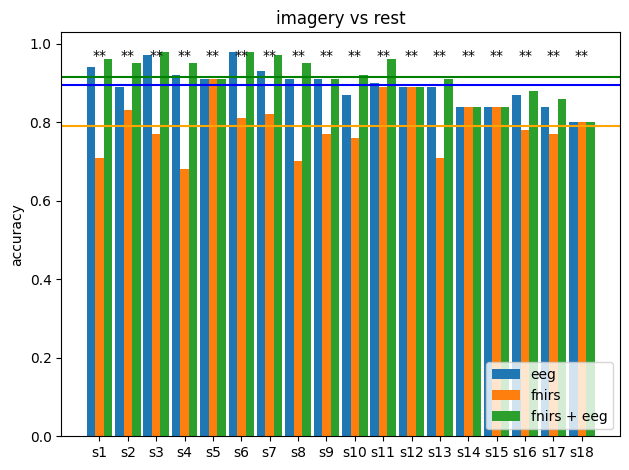

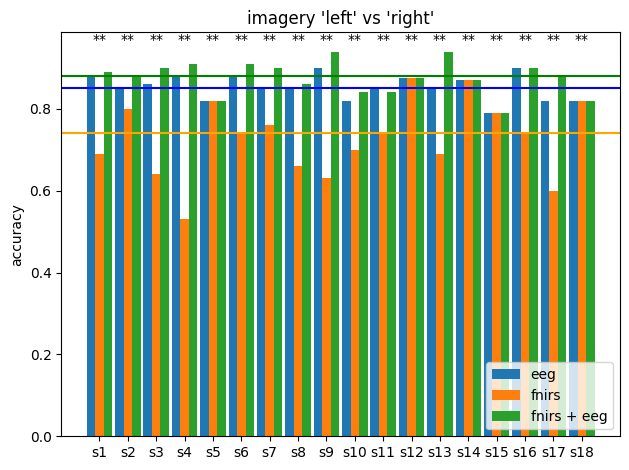

In [15]:
subjets = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18']
X_axis = np.arange(len(subjets))
fig, axes= plt.subplots(1)
axes.bar(X_axis -0.3, dwt_fs_left_rest, 0.3, label= 'eeg')
axes.bar(X_axis, nris_left_rest, 0.3, label= 'fnirs')
axes.bar(X_axis +0.3, nirs_eeg_left_rest, 0.3, label= 'fnirs + eeg')

plt.axhline(y=np.median(dwt_fs_left_rest), color="blue")
plt.axhline(y=np.median(nris_left_rest), color="orange")
plt.axhline(y=np.median(nirs_eeg_left_rest), color="green")

for i, s in enumerate(subjets):
    if nirs_eeg_left_rest[i] > confidence_99_left_right[i] :
        plt.text(i, 0.95, '**', ha='center', va='bottom', c='k')
    elif nirs_eeg_left_rest[i] > confidence_95_left_right[i] :
        plt.text(i, 0.95, '*', ha='center', va='bottom', c='k')
        
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("imagery vs rest")
plt.tight_layout()
axes.legend(loc="lower right")



fig, axes= plt.subplots(1)
axes.bar(X_axis -0.3, dwt_fs_left_right, 0.3, label= 'eeg')
axes.bar(X_axis, nirs_left_right, 0.3, label= 'fnirs')
axes.bar(X_axis +0.3, nirs_eeg_left_right, 0.3, label= 'fnirs + eeg')

plt.axhline(y=np.median(dwt_fs_left_right), color="blue")
plt.axhline(y=np.median(nirs_left_right), color="orange")
plt.axhline(y=np.median(nirs_eeg_left_right), color="green")

for i, s in enumerate(subjets):
    if nirs_eeg_left_right[i] > confidence_99_left_right[i] :
        plt.text(i, 0.95, '**', ha='center', va='bottom', c='k')
    elif nirs_eeg_left_right[i] > confidence_95_left_right[i] :
        plt.text(i, 0.95, '*', ha='center', va='bottom', c='k')
        
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("imagery 'left' vs 'right'")
plt.tight_layout()
axes.legend(loc="lower right")

Text(0.5, 1.0, 'fNIRS : left vs right')

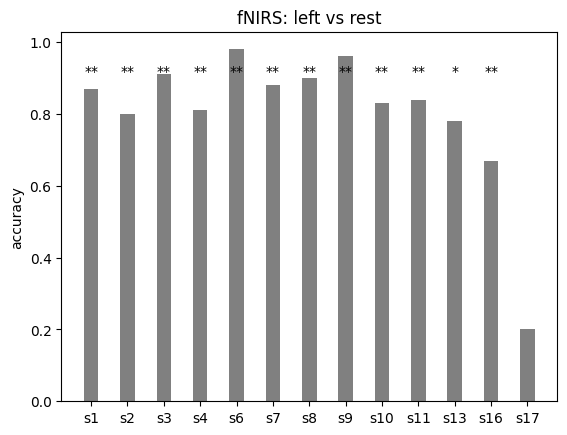

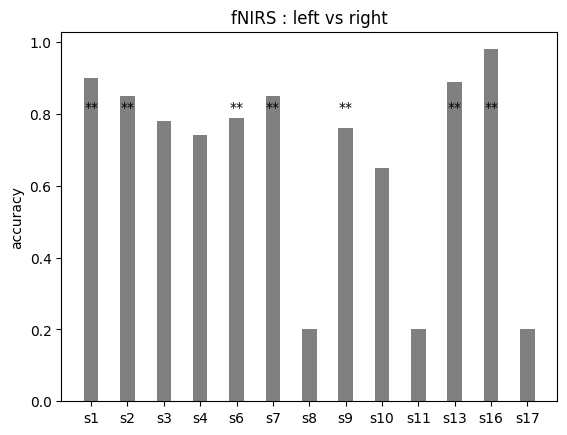

In [21]:
subjets = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17']
X_axis = np.arange(len(subjets))

fig, axes= plt.subplots(1)
axes.bar(X_axis, nirs_eeg_left_rest, 0.4, color="grey")
# plt.axhline(y=np.median(nirs_eeg_left_rest), color="grey")
plt.text(0, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(2, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(11, 0.9, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("fNIRS: left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis, nirs_eeg_left_right, 0.4, color="grey")
# plt.axhline(y=np.median(nirs_eeg_left_rest), color="grey")
plt.text(0, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(11, 0.8, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("fNIRS : left vs right")

Text(0.5, 1.0, 'fNIRS : left vs right')

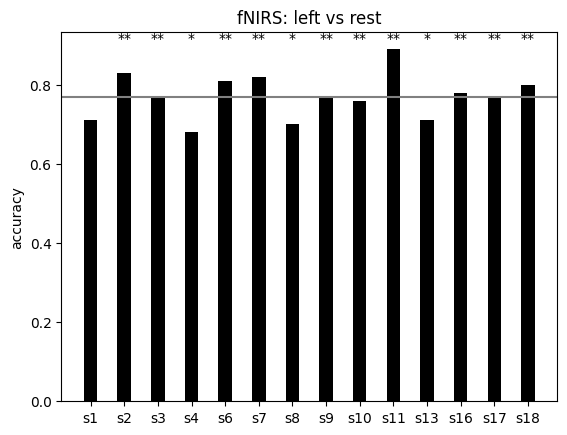

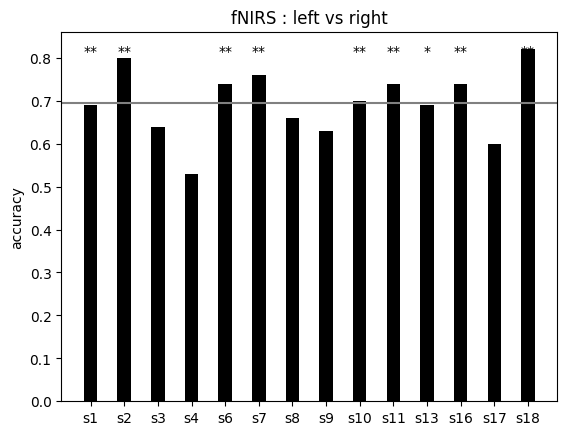

In [18]:
subjets = ['s1','s2','s3','s4','s6','s7','s8','s9','s10','s11','s13','s16','s17','s18']
X_axis = np.arange(len(subjets))

fig, axes= plt.subplots(1)
axes.bar(X_axis, nris_left_rest, 0.4, color="black")
plt.axhline(y=np.median(nris_left_rest), color="grey")
plt.text(1, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(2, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(4, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(7, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(11, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(12, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(13, 0.9, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("fNIRS: left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis, nirs_left_right, 0.4, color="black")
plt.axhline(y=np.median(nirs_left_right), color="grey")
plt.text(0, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(11, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(13, 0.8, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("fNIRS : left vs right")

In [ ]:
subjets = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17']
fig, axes= plt.subplots(1)
X_axis = np.arange(len(subjets))

axes.bar(X_axis-.2, train_accuracy_left_rest, 0.4, label = 'train')
axes.bar(X_axis+.2, test_accuracy_left_rest, 0.4, label = 'test')
plt.text(1, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(3, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(4, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(5, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(14, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(15, 0.9, '*', ha='center', va='bottom', c='k')

plt.axhline(y=np.median(train_accuracy_left_rest), color="grey")
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.legend()
axes.set_title("left vs rest : avg pwr")

fig, axes= plt.subplots(1)
axes.bar(X_axis-.2, train_accuracy_left_right, 0.4, label = 'train')
axes.bar(X_axis+.2, test_accuracy_left_right, 0.4, label = 'test')
plt.text(3, 0.75, '*', ha='center', va='bottom', c='k')
plt.text(7, 0.75, '**', ha='center', va='bottom', c='k')
plt.text(11, 0.75, '*', ha='center', va='bottom', c='k')
plt.text(13, 0.75, '*', ha='center', va='bottom', c='k')

plt.axhline(y=np.median(train_accuracy_left_right), color="grey")
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.legend()
axes.set_title("left vs right : avg pwr")




Text(0.5, 1.0, 'DWT : left vs right')

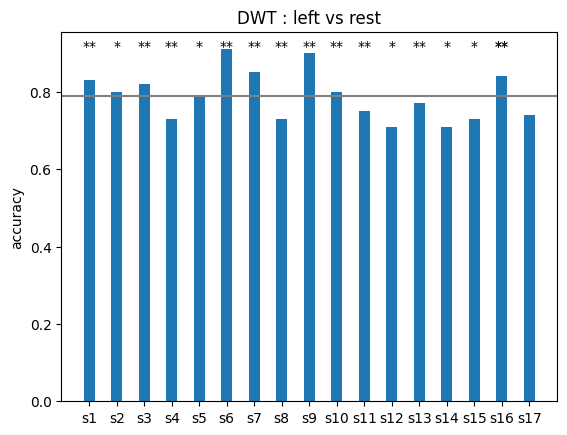

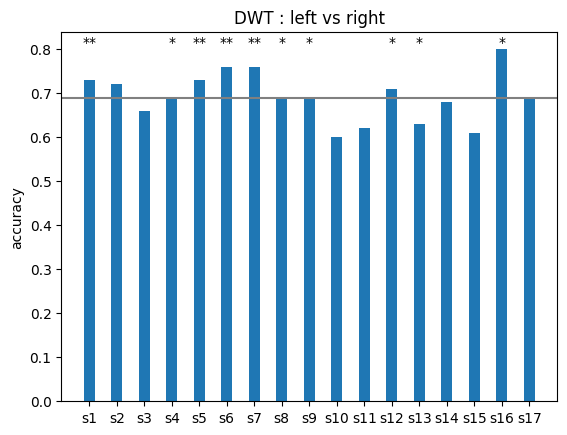

In [10]:
fig, axes= plt.subplots(1)
axes.bar(X_axis, dwt_score_left_rest, 0.4,)
plt.axhline(y=np.median(dwt_score_left_rest), color="grey")
plt.text(0, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(2, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(5, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(11, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(12, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(13, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(14, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(15, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(16, 0.9, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("DWT : left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis, dwt_score_left_right, 0.4)
plt.axhline(y=np.median(dwt_score_left_right), color="grey")
plt.text(0, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(4, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.8, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(8, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(11, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(12, 0.8, '*', ha='center', va='bottom', c='k')
plt.text(15, 0.8, '*', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("DWT : left vs right")

Text(0.5, 1.0, 'DWT, feature extraction: : left vs right')

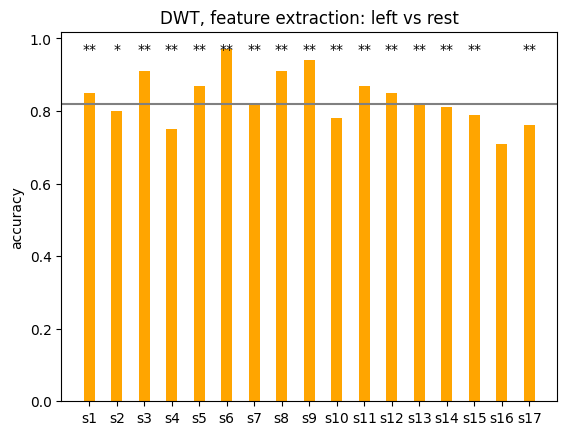

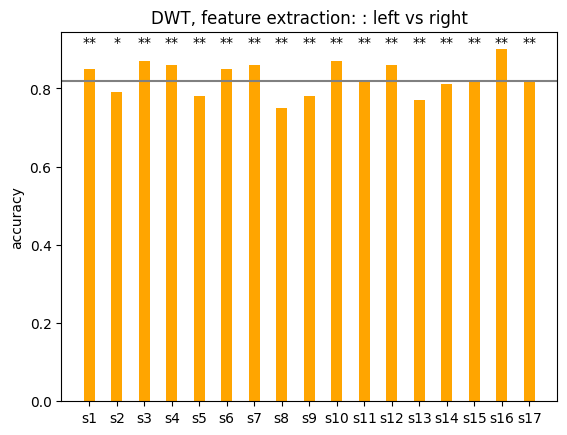

In [20]:
fig, axes= plt.subplots(1)
axes.bar(X_axis, dwt_fs_left_rest, 0.4, color="orange")
plt.axhline(y=np.median(dwt_fs_left_rest), color="grey")
plt.text(0, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.95, '*', ha='center', va='bottom', c='k')
plt.text(2, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(11, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(12, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(13, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(14, 0.95, '**', ha='center', va='bottom', c='k')
plt.text(16, 0.95, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("DWT, feature extraction: left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis, dwt_fs_left_right, 0.4, color="orange")
plt.axhline(y=np.median(dwt_fs_left_right), color="grey")
plt.text(0, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(1, 0.9, '*', ha='center', va='bottom', c='k')
plt.text(2, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(3, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(4, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(5, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(6, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(7, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(8, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(9, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(10, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(11, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(12, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(13, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(14, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(15, 0.9, '**', ha='center', va='bottom', c='k')
plt.text(16, 0.9, '**', ha='center', va='bottom', c='k')

plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("DWT, feature extraction: : left vs right")

In [ ]:
fig, axes= plt.subplots(1)
axes.bar(X_axis, psd_score_left_rest, 0.4,)

plt.axhline(y=np.median(psd_score_left_rest), color="grey")
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("COV : left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis, psd_score_left_right, 0.4)
plt.text(3, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(4, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(8, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(12, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(14, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(15, 0.62, '*', ha='center', va='bottom', c='k')
plt.text(16, 0.62, '*', ha='center', va='bottom', c='k')
plt.axhline(y=np.median(psd_score_left_right), color="grey")
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.set_title("COV : left vs right")

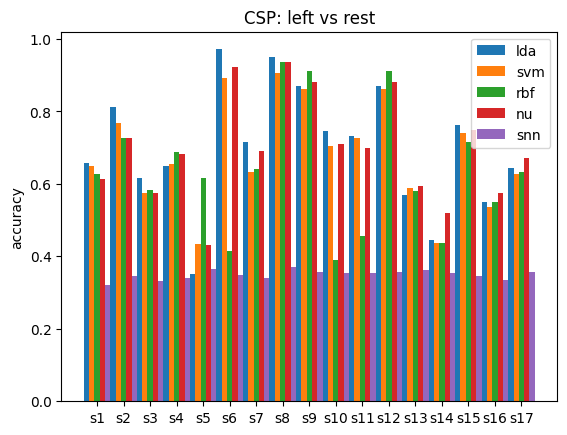

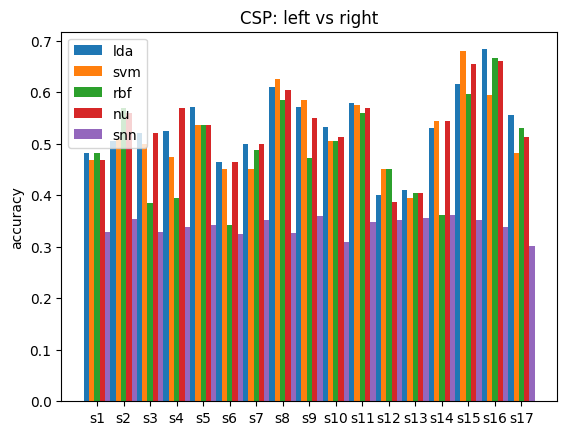

In [61]:
subjets = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17']
labels = ['s1','.','s2','.','s3','.','s4','.','s5','.','s6','.','s7','.','s8','.','s9','.','s10','.','s11','.','s12','.','s13','.','s14','.','s15','.','s16','.','s17']
classifiers = ['lda', 'svm', 'rbf', 'nu', 'snn']
X_axis = np.arange(1,len(subjets)*2,2)
fig, axes= plt.subplots(1)

offset = -.8
i = 0
for s in np.array(l_rst_csp).T:
    axes.bar(X_axis+offset, s, 0.4, label=classifiers[i])
    offset += .4
    i+=1

plt.ylabel("accuracy")
axes.set_xticks(np.arange(1,len(subjets)*2,2))
axes.set_xticklabels(subjets)
plt.tick_params(axis='x', which='major', labelsize=10)
axes.set_title("CSP: left vs rest")
axes.legend()

offset = -.8
i = 0
fig, axes= plt.subplots(1)

for s in np.array(l_rgh_csp).T:
    axes.bar(X_axis+offset, s, 0.4, label=classifiers[i])
    offset += .4
    i+=1

plt.ylabel("accuracy")
axes.set_xticks(np.arange(1,len(subjets)*2,2))
axes.set_xticklabels(subjets)
plt.tick_params(axis='x', which='major', labelsize=10)
axes.set_title("CSP: left vs right")
axes.legend()


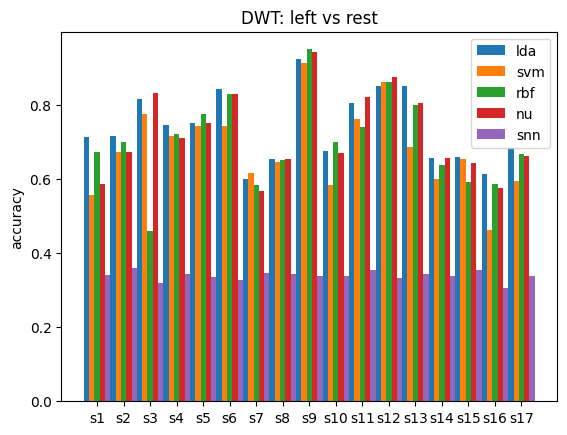

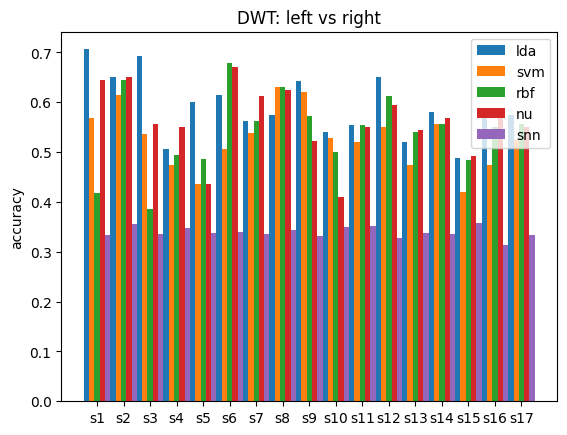

In [62]:
offset = -.8
i = 0
fig, axes= plt.subplots(1)

for s in np.array(l_rst_dwt).T:
    axes.bar(X_axis+offset, s, 0.4, label=classifiers[i])
    offset += .4
    i+=1

plt.ylabel("accuracy")
axes.set_xticks(np.arange(1,len(subjets)*2,2))
axes.set_xticklabels(subjets)
plt.tick_params(axis='x', which='major', labelsize=10)
axes.set_title("DWT: left vs rest")
axes.legend()

offset = -.8
i = 0
fig, axes= plt.subplots(1)

for s in np.array(l_rgh_dwt).T:
    axes.bar(X_axis+offset, s, 0.4, label=classifiers[i])
    offset += .4
    i+=1

plt.ylabel("accuracy")
axes.set_xticks(np.arange(1,len(subjets)*2,2))
axes.set_xticklabels(subjets)
plt.tick_params(axis='x', which='major', labelsize=10)
axes.set_title("DWT: left vs right")
axes.legend()

In [29]:
X_axis

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33])

different classifiers CSP: left vs rest

In [56]:
l_rst_csp = []
#s1
l_rst_csp.append([0.6571428571428571, 0.6499999999999998, 0.6285714285714284, 0.6142857142857142, 0.32136966325342653])
#s2
l_rst_csp.append([0.8111111111111112, 0.7666666666666667, 0.7277777777777779,  0.72777777, 0.34694468006491663])
#s3
l_rst_csp.append([0.6166666666666666, 0.575, 0.5833333333333333, 0.575, 0.33202747628092766])
#s4
l_rst_csp.append([0.6499999999999999, 0.6555555555555557, 0.6888888888888888, 0.6833333333333332, 0.3403698854148388])
#s5
l_rst_csp.append([0.3499999999999999, 0.4333333333333334, 0.6166666666666666, .43, 0.36578212194144727])
#s6
l_rst_csp.append([0.9714285714285715, 0.8928571428571429, 0.4142857142857143, 0.9214285714285715, 0.3478340685367584])
#s7
l_rst_csp.append([0.7166666666666666, 0.6333333333333332, 0.6416666666666666, 0.6916666666666667, 0.34046133533120154])
#s8
l_rst_csp.append([0.9499999999999998, 0.9049999999999999, 0.9349999999999998, 0.9349999999999998, 0.3713588498532772])
#s9
l_rst_csp.append([0.86875, 0.8625, 0.9125, 0.88125, 0.3571584761142731])
#s10
l_rst_csp.append([0.745, 0.7049999999999998, 0.39000000000000007, 0.7099999999999999, 0.3526556257158518])
#s11
l_rst_csp.append([0.7333333333333334, 0.7277777777777779, 0.45555555555555555, 0.7, 0.3541857674717903])
#12
l_rst_csp.append([0.86875, 0.8625, 0.9125, 0.88125, 0.3571584761142731])
#13
l_rst_csp.append([0.56875, 0.5875, 0.58125, 0.59375, 0.3624876268208027])
#14
l_rst_csp.append([0.44375, 0.4375, 0.4375, 0.51875, 0.3538197636604309])
#15
l_rst_csp.append([0.7625, 0.740625, 0.715625, 0.75, 0.34495468288660047])
#16
l_rst_csp.append([0.55, 0.5375, 0.55, 0.575, 0.334499853849411])
#17
l_rst_csp.append([0.6444444444444444, 0.6277777777777777, 0.6333333333333332, 0.6722222222222223, 0.35710152313113214])

different classifiers DWT: left vs rest

In [57]:
l_rst_dwt = []
l_rst_dwt.append([0.7142857142857142, 0.5571428571428572, 0.6714285714285713, 0.5857142857142856, 0.34058977514505384])
#s2
l_rst_dwt.append([0.7166666666666666, 0.6722222222222222, 0.7,  0.6722222222222222, 0.3603089634329081])
#s3
l_rst_dwt.append([0.8166666666666668, 0.7749999999999999, 0.45833333333333337, 0.8333333333333334, 0.3202773865312338])
#s4
l_rst_dwt.append([0.7444444444444445, 0.7166666666666667, 0.7222222222222222, 0.7111111111111111, 0.3442439451813698])
#s5
l_rst_dwt.append([0.75, 0.7416666666666667, 0.775, 0.75, 0.3362811401486397])
#s6
l_rst_dwt.append([0.8428571428571429, 0.7428571428571428, 0.8285714285714286, 0.8285714285714285, 0.3273456536233425])
#s7
l_rst_dwt.append([0.5999999999999999, 0.6166666666666666, 0.5833333333333333, 0.5666666666666667, 0.3474508050829172])
#s8
l_rst_dwt.append([0.6549999999999999, 0.6449999999999998, 0.6499999999999999, 0.6549999999999999, 0.3439574182033539])
#s9
l_rst_dwt.append([0.925, 0.9125, 0.95, 0.94375, 0.33773853406310084])
#s10
l_rst_dwt.append([0.6749999999999999, 0.585, 0.7, 0.6699999999999999, 0.3372407708317041])
#s11
l_rst_dwt.append([0.8055555555555557, 0.761111111111111, 0.738888888888889, 0.8222222222222223, 0.35379352495074273])
#s12
l_rst_dwt.append([0.85, 0.8625, 0.8625, 0.875, 0.3326990224421024])
#s13
l_rst_dwt.append([0.85, 0.6875, 0.8, 0.80625, 0.3423944257199764])
#s14
l_rst_dwt.append([0.65625, 0.6, 0.6375, 0.65625, 0.3381586343050003])
#s15
l_rst_dwt.append([0.659375, 0.653125, 0.590625, 0.64375, 0.35344804972410204])
#s16
l_rst_dwt.append([0.6125, 0.4625, 0.5875, 0.575, 0.3046905420720577])
#s17
l_rst_dwt.append([0.6833333333333332, 0.5944444444444444, 0.6666666666666667, 0.6611111111111111, 0.337870529666543])

different classifiers CSP: left vs right

In [58]:
l_rgh_csp = []
l_rgh_csp.append([0.48125, 0.46875, 0.48125, 0.46875, 0.328259389847517])
#s2
l_rgh_csp.append([0.505, 0.51, 0.57, 0.5599999999999999, 0.35335453078150747])
#3
l_rgh_csp.append([0.5214285714285715, 0.5000000000000001, 0.3857142857142857, 0.5214285714285714, 0.32810664661228656])
#4
l_rgh_csp.append([0.525, 0.475, 0.39375, 0.56875, 0.3390556417405605])
#5
l_rgh_csp.append([0.5714285714285714, 0.5357142857142856, 0.5357142857142856, .5357142857142856, 0.3427011914551258])
#s6
l_rgh_csp.append([0.4642857142857143, 0.45, 0.3428571428571428, 0.4642857142857143, 0.32536844685673716])
#s7
l_rgh_csp.append([0.5, 0.45, 0.4875, 0.5, 0.3511783093214035])
#s8
l_rgh_csp.append([0.61, 0.6249999999999998, 0.5849999999999999, 0.6049999999999999, 0.32669605277478697])
#s9
l_rgh_csp.append([0.5714285714285714, 0.5857142857142856, 0.47142857142857153, 0.5499999999999999, 0.3603574067354202])
#s10
l_rgh_csp.append([0.5318181818181819, 0.5045454545454545, 0.5045454545454544, 0.5136363636363637, 0.3087039805948734])
#s11
l_rgh_csp.append([0.5799999999999998, 0.5749999999999998, 0.5599999999999998, 0.57, 0.3487420968711376])
#s12
l_rgh_csp.append([0.4, 0.45, 0.45, 0.3875, 0.3516247391700745])
#13
l_rgh_csp.append([0.41, 0.395, 0.4050000000000001, 0.40499999999999997, 0.3560539476573467])
#14
l_rgh_csp.append([0.53125, 0.54375, 0.3625, 0.54375, 0.3606782011687756])
#15
l_rgh_csp.append([0.6153846153846153, 0.6807692307692308, 0.5961538461538461, 0.6538461538461539, 0.3515419982373714])
#16
l_rgh_csp.append([0.6833333333333332, 0.5944444444444444, 0.6666666666666667, 0.6611111111111111, 0.337870529666543])
#18
l_rgh_csp.append([0.55625, 0.48125, 0.53125, 0.5125, 0.3023835189640522])

different classifiers DWT: left vs right

In [60]:
l_rgh_dwt = []
l_rgh_dwt.append([0.70625, 0.56875, 0.41875, 0.64375, 0.33449315279722214])
#2
l_rgh_dwt.append([0.6499999999999999, 0.615, 0.6449999999999999, 0.6499999999999999, 0.3556674294173717])
#3
l_rgh_dwt.append([0.6928571428571427, 0.5357142857142858, 0.3857142857142857, 0.5571428571428572, 0.3364317394793034])
#4
l_rgh_dwt.append([0.50625, 0.475, 0.49375, 0.55, 0.3480049341917038])
#5
l_rgh_dwt.append([0.5999999999999999, 0.4357142857142858, 0.48571428571428565, .4357142857142858, 0.3367604106664658])
#s6
l_rgh_dwt.append([0.6142857142857141, 0.5071428571428571, 0.6785714285714285, 0.6714285714285715, 0.3387765549123287])
#s7
l_rgh_dwt.append([0.5625, 0.5375, 0.5625, 0.6125, 0.33616410456597806])
#s8
l_rgh_dwt.append([0.575, 0.63, 0.63, 0.6249999999999999, 0.3431976564228535])
#s9
l_rgh_dwt.append([0.6428571428571428, 0.6214285714285713, 0.5714285714285714, 0.5214285714285714, 0.3312896233052015])
#s10
l_rgh_dwt.append([0.5409090909090909, 0.5272727272727272, 0.4999999999999999, 0.409090909090909, 0.34907702207565305])
#s11
l_rgh_dwt.append([0.5549999999999999, 0.5199999999999999, 0.5549999999999999, 0.5499999999999999, 0.35108104571700094])
#s12
l_rgh_dwt.append([0.65, 0.55, 0.6125, 0.59375, 0.32732318714261055])
#s13
l_rgh_dwt.append([0.5199999999999999, 0.4750000000000001, 0.5399999999999999, 0.545, 0.33834450095891955])
#s14
l_rgh_dwt.append([0.58125, 0.55625, 0.55625, 0.56875, 0.33548461422324183])
#s15
l_rgh_dwt.append([0.4884615384615384, 0.41923076923076935, 0.48461538461538467, 0.4923076923076922, 0.35735526978969573])
#s16
l_rgh_dwt.append([0.5875, 0.475, 0.55, 0.575, 0.31423310115933417])
#s17
l_rgh_dwt.append([0.575, 0.525, 0.55625, 0.55, 0.33307352662086487])

Global ERP response

In [2]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
left_rest_scores = []
epochs = []
i = 0
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        for file in os.listdir(dr):
            if 'ica_epo' in str(file) :
                if i == 0:
                    epochs = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    epochs = epochs.interpolate_bads()
                else :
                    new = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    new = new.interpolate_bads()
                    epochs = concatenate_epochs([epochs,new])
                i+=1

Reading C:\Users\at18157\Desktop\bci\data\ah\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 55 sensor positions
Interpolating 9 sensors
Reading C:\Users\at18157\Desktop\bci\data\da\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
Not setting metadata
189 matching events found
No baseline correction applied
Reading C:\Users\at18157\Desktop\bci\

Not setting metadata
1463 matching events found
No baseline correction applied
Reading C:\Users\at18157\Desktop\bci\data\ysf\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 7 sensors
Not setting metadata
1557 matching events found
No baseline correction applied


In [14]:
freqs = [7.,18.,35.,60.,90.,120.]
freq_ranges = list(zip(freqs[:-1], freqs[1:]))

from  7.0  to fmax 18.0


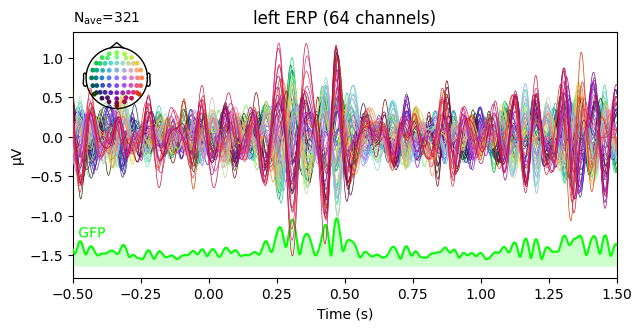

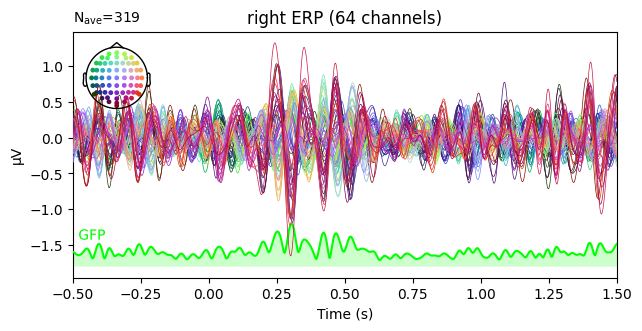

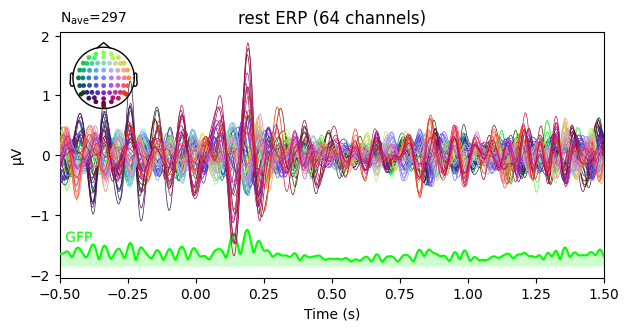

...
...




from  18.0  to fmax 35.0


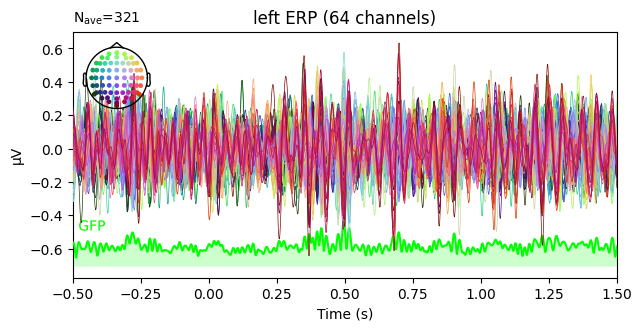

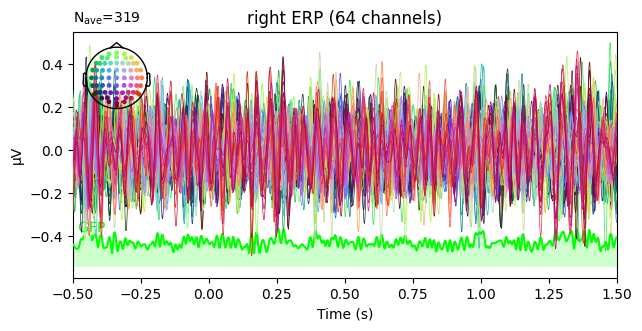

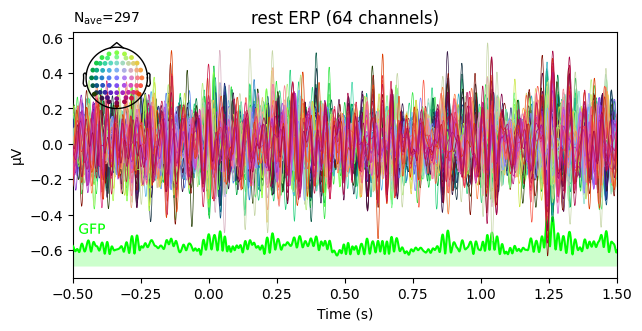

...
...




from  35.0  to fmax 60.0


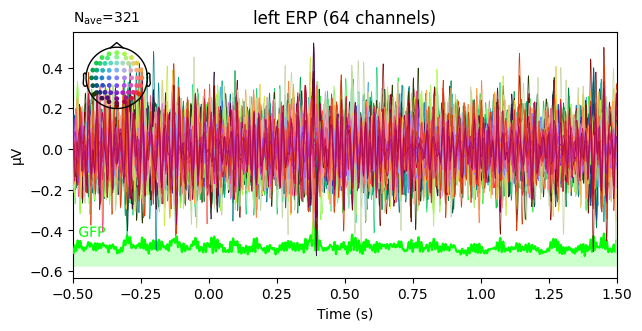

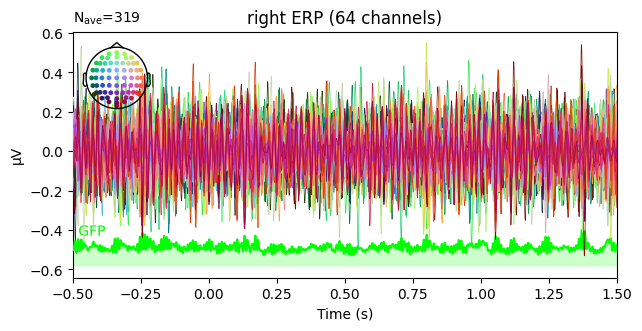

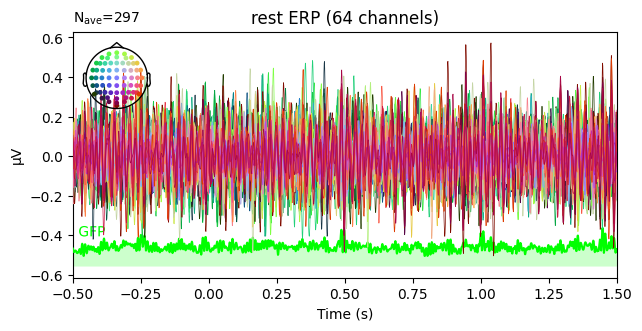

...
...




from  60.0  to fmax 90.0


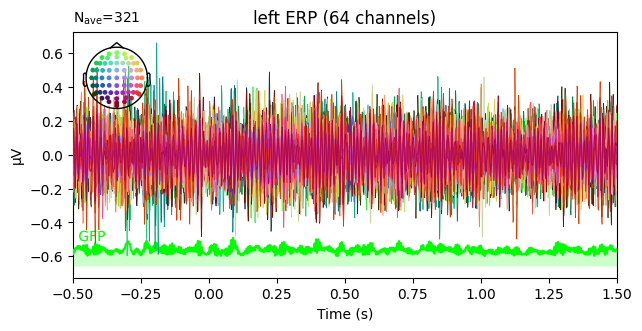

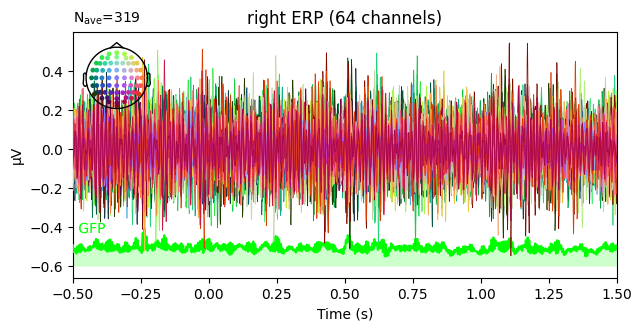

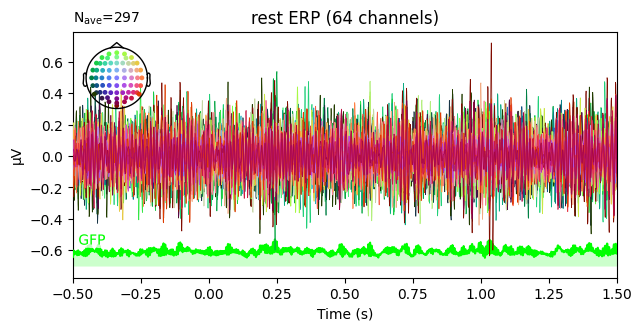

...
...




from  90.0  to fmax 120.0


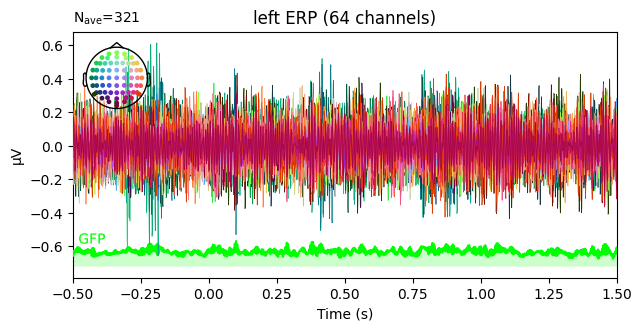

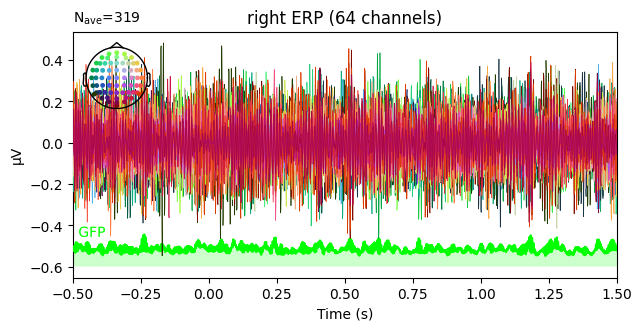

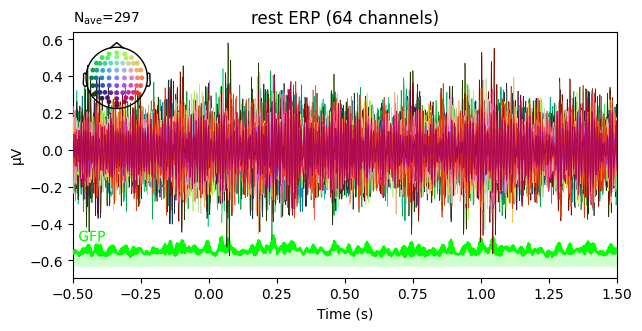

...
...






In [23]:
for freq, (fmin, fmax) in enumerate(freq_ranges):
    print('from ', fmin, ' to fmax', fmax)
    epochs['left'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='left ERP', gfp=True)
    epochs['right'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='right ERP', gfp=True)
    epochs['rest'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='rest ERP', gfp=True)
    print('...')
    print('...\n\n\n\n')    